# Task 1, section 1: Naive simulation using matrix multiplication

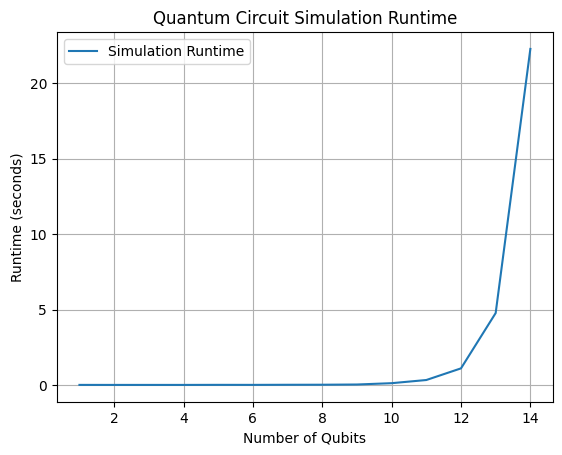

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define gates
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard gate
I = np.array([[1, 0], [0, 1]])  # Identity gate
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])  # CNOT gate

# Function to generate the initial state |0...0>
def initial_state(n):
    state = np.zeros(2**n)
    state[0] = 1  # Start in |0...0> state
    return state

# Function to apply a gate to a state vector
def apply_gate(gate, state, qubit, n):
    # Create full matrix with Kronecker products for all qubits
    gate_full = 1
    for i in range(n):
        if i == qubit:
            gate_full = np.kron(gate_full, gate)
        else:
            gate_full = np.kron(gate_full, I)

    return np.dot(gate_full, state)

# Function to apply multi-qubit gate (e.g., CNOT)
def apply_cnot(state):
    return np.dot(CNOT, state)

# Simulate the circuit for n qubits
def simulate_circuit(n):
    state = initial_state(n)

    # Apply some gates (for demonstration, apply X to qubit 0, H to qubit 1)
    state = apply_gate(X, state, 0, n)
    state = apply_gate(H, state, 1, n)

    return state

# Measure the runtime for different numbers of qubits
def measure_runtime():
    qubits = list(range(1, 15))  # Test from 1 to 15 qubits
    runtimes = []

    for n in qubits:
        start_time = time.time()
        simulate_circuit(n)
        end_time = time.time()
        runtimes.append(end_time - start_time)

    return qubits, runtimes

# Run the measurement
qubits, runtimes = measure_runtime()

# Plot the runtime as a function of the number of qubits
plt.plot(qubits, runtimes, label='Simulation Runtime')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Quantum Circuit Simulation Runtime')
plt.legend()
plt.grid(True)
plt.show()


# Task 1, section 2: Advanced simulation using tensor multiplication

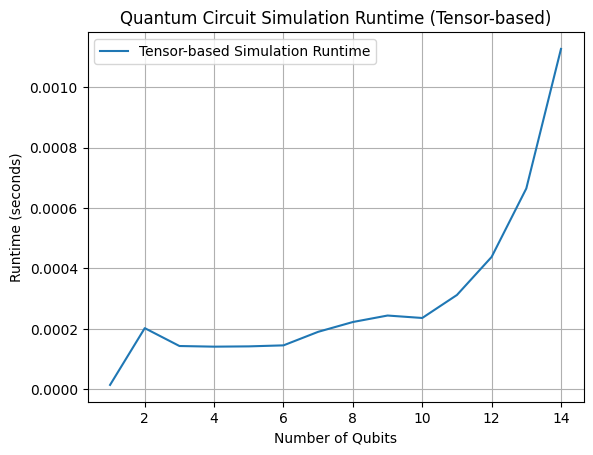

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define gates
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard gate
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])  # CNOT gate

# Function to generate the initial state |0...0> as a tensor of shape (2**n,)
def initial_state_tensor(n):
    state = np.zeros(2**n, dtype=complex)
    state[0] = 1  # Start in |0...0> state
    return state

# Function to apply a 1-qubit gate
def apply_single_qubit_gate(gate, state, qubit, n):
    # Reshape state to (2, 2, ..., 2)
    state = state.reshape([2] * n)
    # Prepare index slices for applying the gate
    idx = [slice(None)] * n
    idx[qubit] = np.newaxis
    # Apply the gate to the qubit
    new_state = np.zeros_like(state, dtype=complex)
    for i in range(2):
        for j in range(2):
            idx[qubit] = j
            new_state += gate[i, j] * state[tuple(idx)]
            idx[qubit] = i
    # Flatten the state back
    state = new_state.flatten()
    return state

# Function to apply a 2-qubit gate
def apply_two_qubit_gate(gate, state, qubit1, qubit2, n):
    # Ensure qubit1 < qubit2 for easier handling of axes
    if qubit1 > qubit2:
        qubit1, qubit2 = qubit2, qubit1
    # Reshape state to (2, 2, ..., 2)
    state = state.reshape([2] * n)
    # Prepare index slices for applying the gate
    idx = [slice(None)] * n
    new_state = np.zeros_like(state, dtype=complex)
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    idx[qubit1] = j
                    idx[qubit2] = l
                    new_state += gate[i * 2 + k, j * 2 + l] * state[tuple(idx)]
                    idx[qubit1] = i
                    idx[qubit2] = k
    # Flatten the state back
    state = new_state.flatten()
    return state

# Simulate the circuit for n qubits using tensors
def simulate_circuit_tensor(n):
    state = initial_state_tensor(n)

    # Apply some gates (for demonstration, apply X to qubit 0, H to qubit 1)
    if n > 1:
        state = apply_single_qubit_gate(X, state, 0, n)
        state = apply_single_qubit_gate(H, state, 1, n)

        # Apply CNOT gate between qubits 0 and 1
        state = apply_two_qubit_gate(CNOT, state, 0, 1, n)

    return state

# Measure the runtime for different numbers of qubits
def measure_runtime_tensor():
    qubits = list(range(1, 15))  # Test from 1 to 11 qubits
    runtimes = []

    for n in qubits:
        start_time = time.time()
        try:
            simulate_circuit_tensor(n)
        except IndexError as e:
            print(f"Failed at {n} qubits with error: {e}")
            break
        end_time = time.time()
        runtimes.append(end_time - start_time)

    return qubits[:len(runtimes)], runtimes

# Run the measurement
qubits, runtimes_tensor = measure_runtime_tensor()

# Plot the runtime as a function of the number of qubits
plt.plot(qubits, runtimes_tensor, label='Tensor-based Simulation Runtime')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Quantum Circuit Simulation Runtime (Tensor-based)')
plt.legend()
plt.grid(True)
plt.show()


# Task 1, section 3: Bonus question

#### How would I sample from the final states in the statevector or tensor representations?

To sample from the final states, I'd measure the state by calculating the probabilities of each possible outcome.

**Answer**: For each element in the statevector, I'd square its magnitude to get the probability of that state.

**Code**:
```python
probabilities = np.abs(state)**2
sampled_states = np.random.choice(range(len(probabilities)), p=probabilities)
```

#### How about computing exact expectation values in the form ⟨Ψ| Op |Ψ⟩?

To compute the expectation value ⟨Ψ| Op |Ψ⟩, I need to apply an operator to the state and then find the inner product with the original state.

**Answer**: First, I apply the operator to the state. Then, I compute the inner product of the conjugate transpose of the state and the resulting state.

**Code**:
```python
op_state = np.dot(operator, state)
exp_value = np.dot(np.conjugate(state), op_state).real
```

This gives me the expectation value, which tells me the average outcome if I were to measure the system many times.
